<a href="https://colab.research.google.com/github/TomPhanAnh/Kaggle-Solution/blob/main/Car_Price_Prediction_(Linear_Regression_RFE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns",100)

# **Problem Statement**
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- **Which variables are significant in predicting the price of a car**
- **How well those variables describe the price of a car**

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.


## **Business Goal**
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## **Step 1: Reading and Understanding the Data**
Let's start with the following steps:

Importing data using the pandas library
Understanding the structure of the data

In [61]:
cars = pd.read_csv("CarPrice_Assignment.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [62]:
cars.shape

(205, 26)

In [63]:
# You can apply plotly to describe better your data visualization
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [64]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## **Step 2 : Data Cleaning and Preparation**

In [65]:
# Splitting company name from CarName column
CompanyName = cars["CarName"].apply(lambda x: x.split(" ")[0])
cars.insert(3, "CompanyName", CompanyName)
cars.drop(["CarName"], axis = 1, inplace = True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [66]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

*Fixing invalid values*

**There seems to be some spelling error in the CompanyName column**

- maxda = mazda
- Nissan = nissan
- porsche = porcshce
- toyota = toyouta
- vokswagen = volkswagen = vw

In [67]:
cars.CompanyName = cars.CompanyName.str.lower()

def replace_name(a,b):
  cars.CompanyName.replace(a,b, inplace = True)

replace_name("maxda","mazda")
replace_name("porcshce","porsche")
replace_name("toyouta","toyota")
replace_name("vokswagen","volkswagen")
replace_name("vw","volkswagen")

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [68]:
# Checking Duplicates values by using cars.duplicated()
cars.loc[cars.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


## **Step 3: Visualizing the data**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


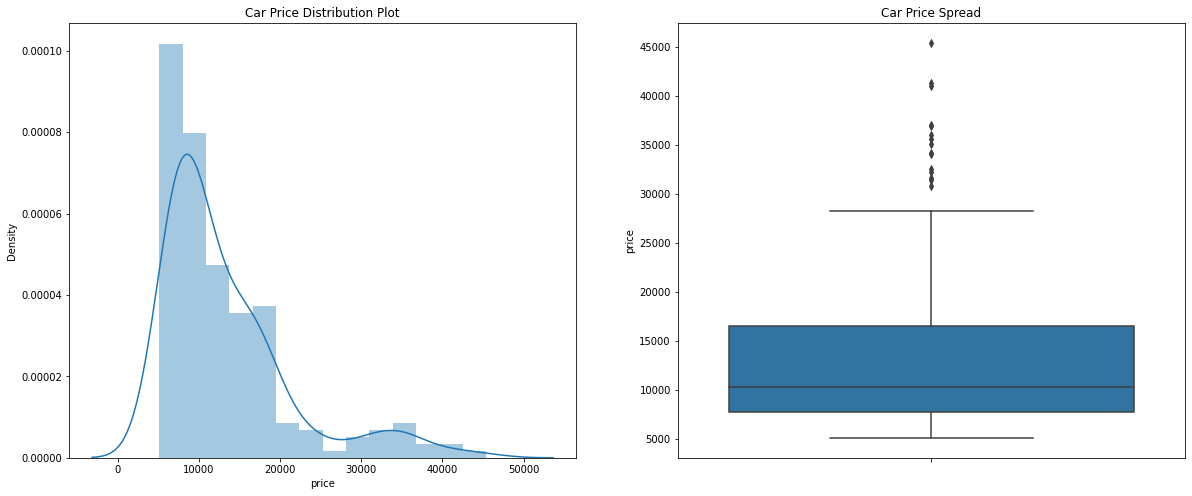

In [69]:
plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
plt.title("Car Price Distribution Plot")
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title("Car Price Spread")
sns.boxplot(y = cars.price)

plt.show()

In [70]:
print(cars.price.describe(percentiles = [0.25,0.5,0.75, 0.9]))
print(100*"-")
print(" ")
cars.price.skew()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
90%      22563.000000
max      45400.000000
Name: price, dtype: float64
----------------------------------------------------------------------------------------------------
 


1.7776781560914454

**Inference :**

  1. The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).

  2. There is a significant difference between the mean and the median of the price distribution.

  3. The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

### **Step 3.1 : Visualising Categorical Data**

In [71]:
## - CompanyName
## - Symboling
## - fueltype
## - enginetype
## - carbody
## - doornumber
## - enginelocation
## - fuelsystem
## - cylindernumber
## - aspiration
## - drivewheel

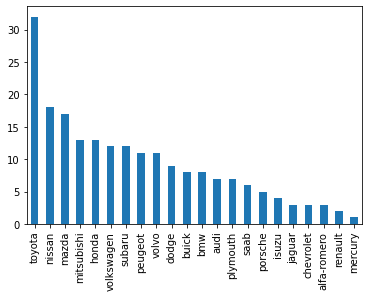

In [72]:
cars["CompanyName"].value_counts().plot(kind = "bar")

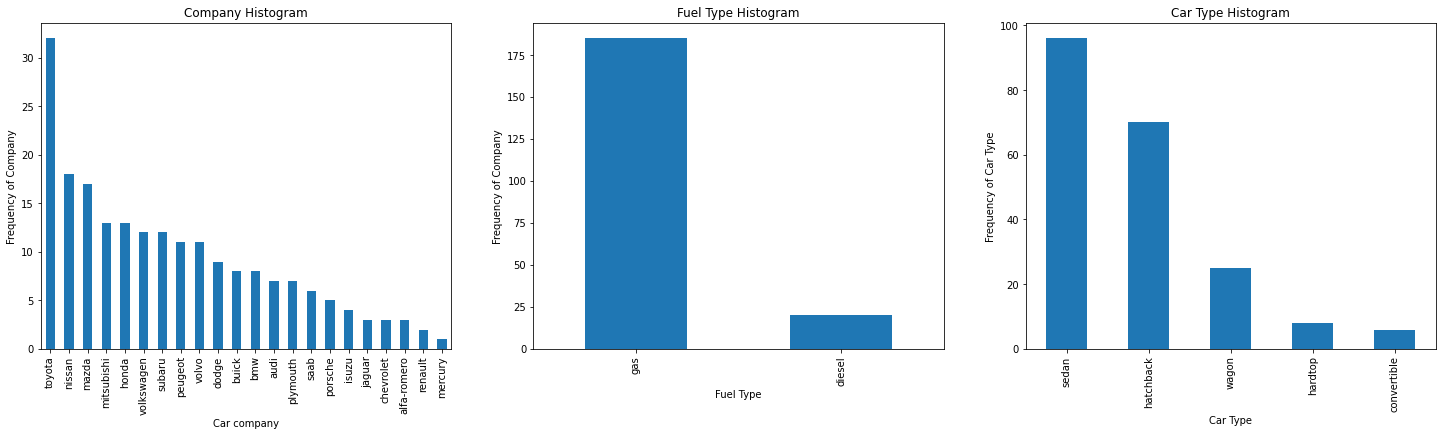

In [73]:
plt.figure(figsize = (25,6))

plt.subplot(1,3,1)
plt1 = cars.CompanyName.value_counts().plot(kind = "bar")
plt.title("Company Histogram")
plt1.set(xlabel = "Car company", ylabel = "Frequency of Company")

plt.subplot(1,3,2)
plt1 = cars.fueltype.value_counts().plot(kind = "bar")
plt.title("Fuel Type Histogram")
plt1.set(xlabel = "Fuel Type", ylabel = "Frequency of Company")

plt.subplot(1,3,3)
plt1 = cars.carbody.value_counts().plot(kind = "bar")
plt.title("Car Type Histogram")
plt1.set(xlabel = "Car Type", ylabel = "Frequency of Car Type")

plt.show()

**Inference :**

1. Toyota seemed to be favored car company.
2. Number of gas fueled cars are more than diesel.
3. sedan is the top car type prefered.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


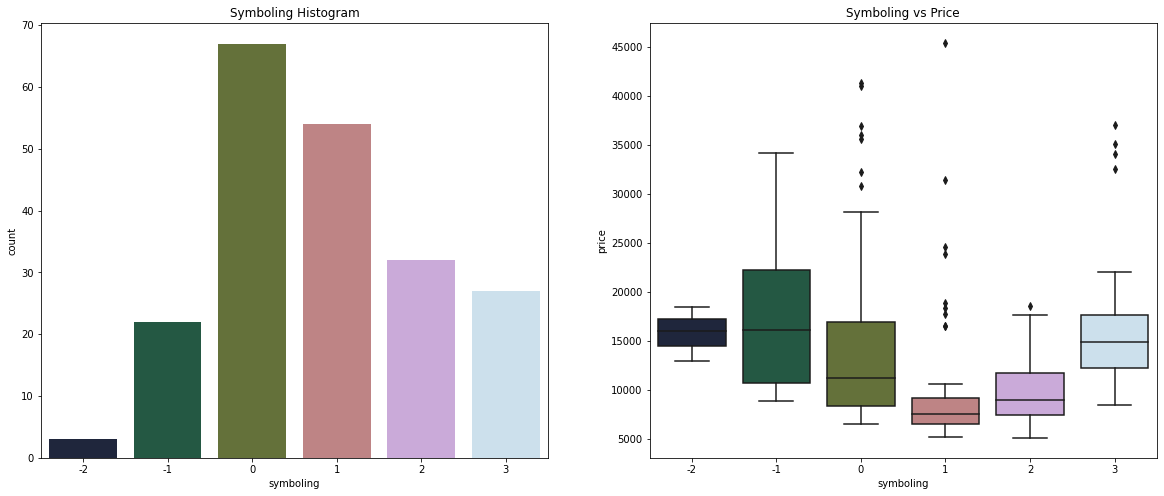

In [74]:
plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
plt.title("Symboling Histogram")
sns.countplot(cars.symboling, palette = ("cubehelix"))

plt.subplot(1,2,2)
plt.title("Symboling vs Price")
sns.boxplot(x = cars.symboling, y = car.price, palette = ("cubehelix"))

**Inference :**
 1. It seems that the symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)
 2. The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


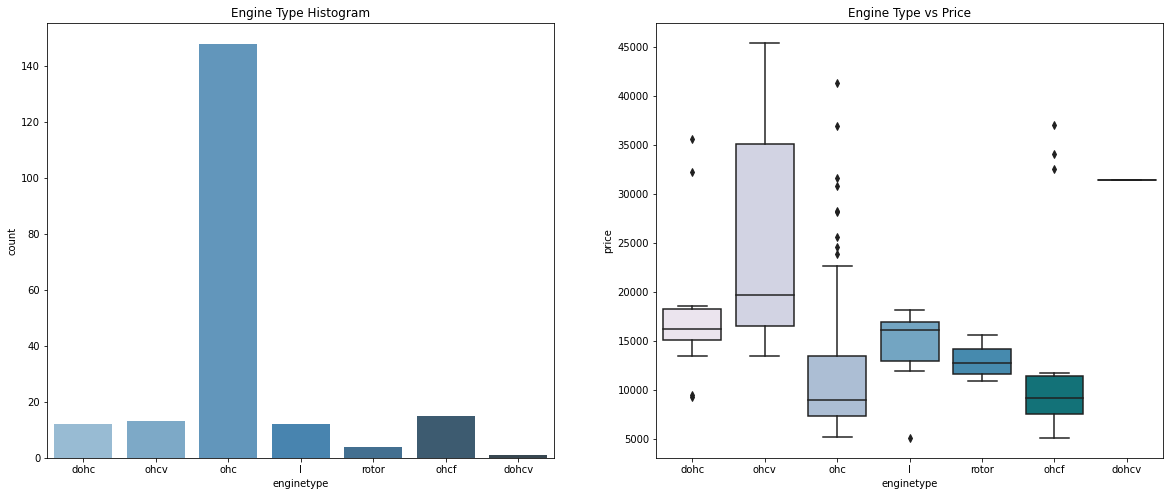

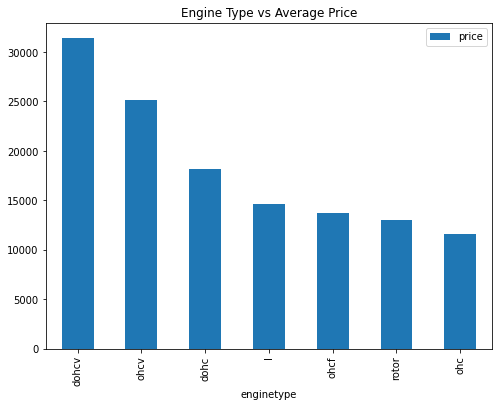

In [75]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.title("Engine Type Histogram")
sns.countplot(cars.enginetype, palette = ("Blues_d"))

plt.subplot(1,2,2)
plt.title("Engine Type vs Price")
sns.boxplot(x = cars.enginetype, y = cars.price, palette = ("PuBuGn"))
 
plt.show()

df = pd.DataFrame(cars.groupby(["enginetype"])["price"].mean().sort_values(ascending = False))
df.plot.bar(figsize = (8,6))
plt.title("Engine Type vs Average Price")
plt.show()

**Inference :**

1. ohc Engine type seems to be most favored type.
2. ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range.

<Figure size 1800x432 with 0 Axes>

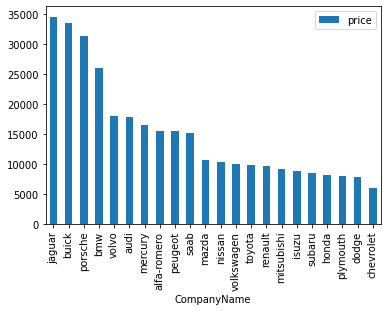

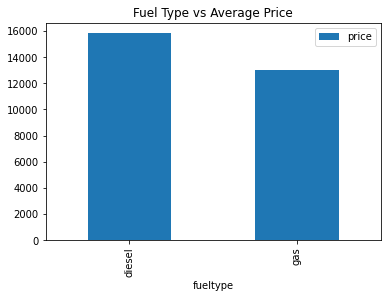

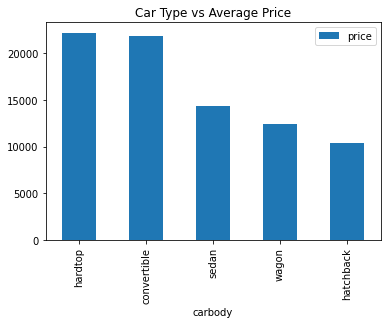

In [76]:
plt.figure(figsize = (25,6))

df = pd.DataFrame(cars.groupby(["CompanyName"])["price"].mean().sort_values(ascending = False))
df.plot(kind = "bar")
plt.show()

df = pd.DataFrame(cars.groupby(["fueltype"])["price"].mean().sort_values(ascending = False))
df.plot(kind = "bar")
plt.title("Fuel Type vs Average Price")
plt.show()

df = pd.DataFrame(cars.groupby(["carbody"])["price"].mean().sort_values(ascending = False))
df.plot(kind = "bar")
plt.title("Car Type vs Average Price")
plt.show()


**Inference :**

1. Jaguar and Buick seem to have highest average price.
2. diesel has higher average price than gas.
3. hardtop and convertible have higher average price.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


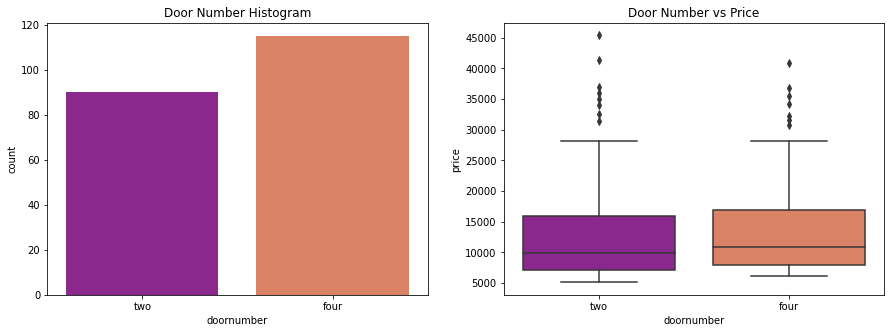

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


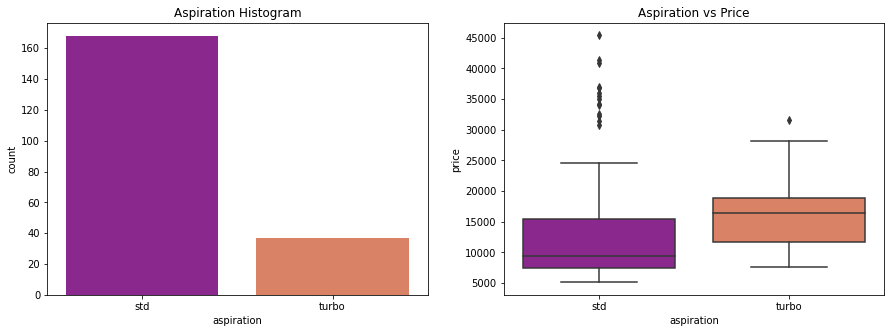

In [77]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title("Door Number Histogram")
sns.countplot(cars.doornumber, palette = ("plasma"))

plt.subplot(1,2,2)
plt.title("Door Number vs Price")
sns.boxplot(x = cars.doornumber, y = cars.price, palette = ("plasma"))
plt.show()

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title("Aspiration Histogram")
sns.countplot(cars.aspiration, palette = ("plasma"))

plt.subplot(1,2,2)
plt.title("Aspiration vs Price")
sns.boxplot(x = cars.aspiration, y = cars.price, palette = ("plasma"))

plt.show()

**Inference :**
1. ***doornumber*** variable is not affacting the price much. There is no sugnificant difference between the categories in it.
2. It seems aspiration with ***turbo*** have higher price range than the std(though it has some high values outside the whiskers.)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

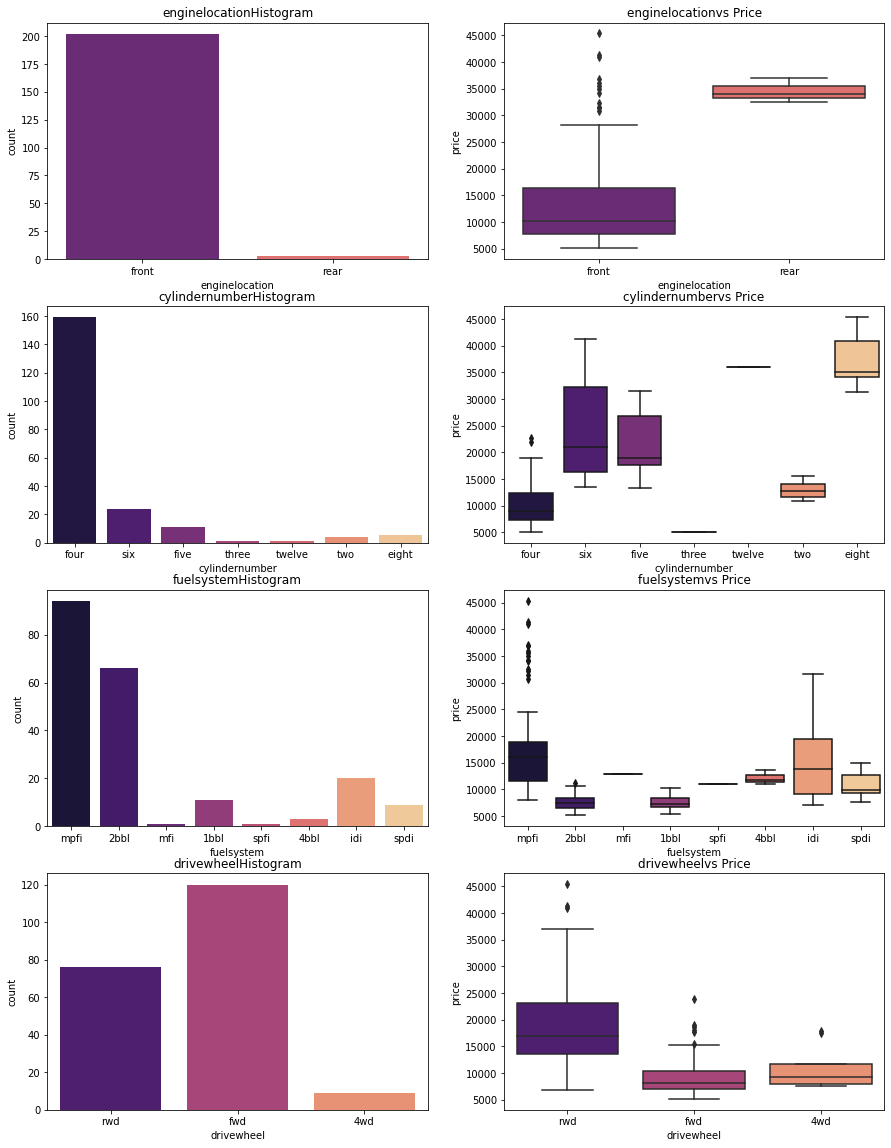

In [78]:
def plot_count(x, fig):
  plt.subplot(4,2,fig)
  plt.title(x + "Histogram")
  sns.countplot(cars[x], palette = ("magma"))
  plt.subplot(4,2, (fig +1))
  plt.title(x + "vs Price")
  sns.boxplot(x = cars[x], y = cars.price, palette = ("magma"))

plt.figure(figsize = (15,20))
plot_count("enginelocation", 1)
plot_count("cylindernumber",3)
plot_count("fuelsystem",5)
plot_count("drivewheel",7)

**Inference :**
1. Very few datapoints for ***enginelocation*** categories to make an inference.
2. Most common number of cylinders are ***four, six and five.*** Though eight cylinders have the highest price range.
3. ***mpfi*** and ***2bbl*** are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for other categories to derive any meaningful inference
4. A very significant difference in drivewheel category. Most high ranged cars seeme to prefer ***rwd*** drivewheel.

## **Step 3.2 : Visualising numerical data**

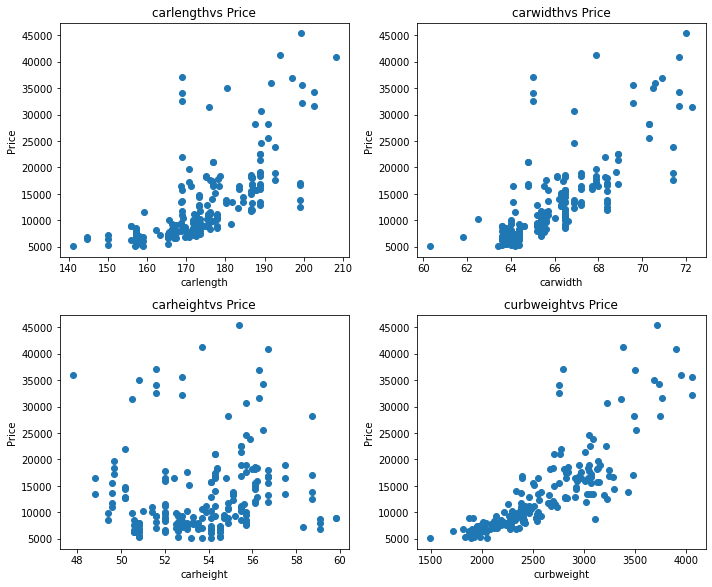

In [90]:
def scatter(x,fig):
  plt.subplot(5,2,fig) 
  # subplot(5?) helps to divide the large picture to smaller ones
  plt.scatter(cars[x], cars["price"])
  plt.title(x + "vs Price")
  plt.ylabel("Price")
  plt.xlabel(x)

plt.figure(figsize = (10,20))

scatter("carlength",1)
scatter("carwidth",2)
scatter("carheight",3)
scatter("curbweight",4)

plt.tight_layout()

**Inference :**
1. ***carwidth, carlength*** and ***curbweight*** seems to have a poitive correlation with price.
2. ***carheight*** doesn't show any significant trend with price.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


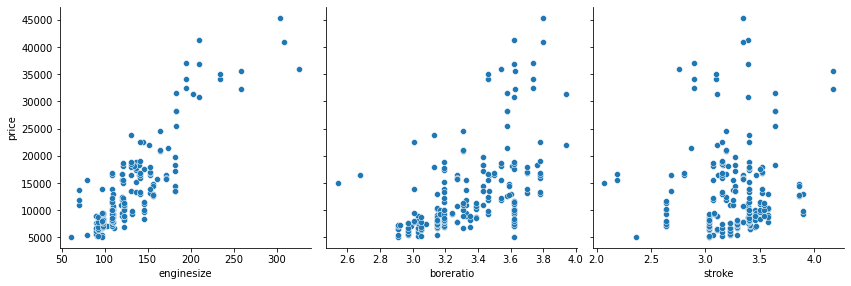

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


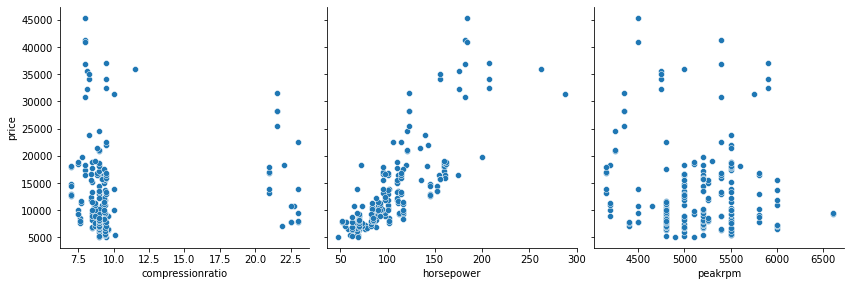

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


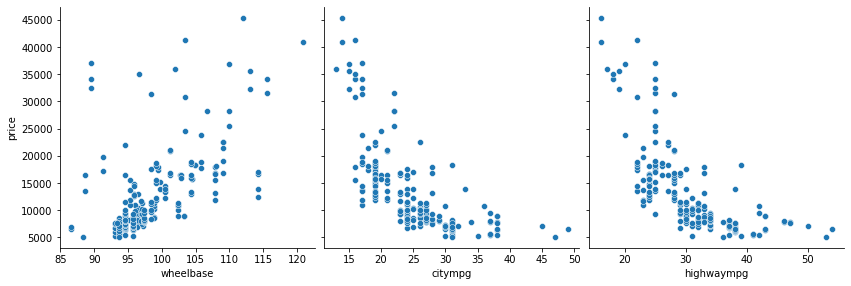

In [94]:
def pp(x,y,z):
  sns.pairplot(cars, x_vars = [x,y,z], y_vars = "price",
               size = 4, aspect = 1, kind = "scatter")
  plt.show()
# Size in pairplot is how large the project would be
pp("enginesize","boreratio","stroke")
pp("compressionratio","horsepower","peakrpm")
pp("wheelbase","citympg","highwaympg")

**Inference :**
1. ***enginesize, boreratio, horsepower, wheelbase -*** seem to have a significant positive correlation with price.
2. ***citympg, highwaympg -*** seem to have a significant negative correlation with price.

In [97]:
np.corrcoef(cars["carlength"], cars["carwidth"])[0,1]

0.841118268481846

## **Step 4 : Deriving new features**

In [98]:
# Fuel economy
cars["fueleconomy"] = (0.55*cars["citympg"]) + (0.45*cars["highwaympg"])

In [100]:
# Binning the Car Companies based on avg.prices of each Company
cars["price"] = cars["price"].astype("int")
temp = cars.copy()
table = temp.groupby(["CompanyName"])["price"].mean()
temp = temp.merge(table.reset_index(), how = "left", on = "CompanyName")

# --------------------------------
temp.head()
# -------------------------------
bins = [0,10000,20000,40000]
cars_bin = ["Budget","Medium","Highend"]
cars["carsrange"] = pd.cut(temp["price_y"], 
                           bins, right = False,
                           labels = cars_bin)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


## **Step 5 : Bivariate Analysis**

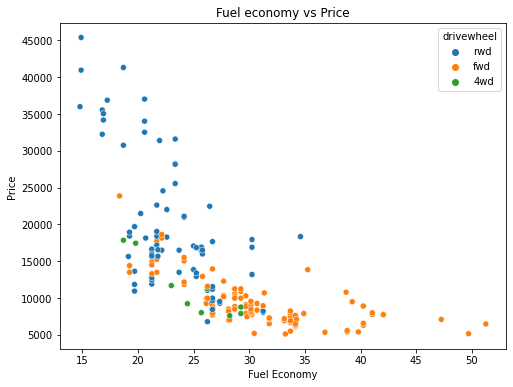

<Figure size 432x288 with 0 Axes>

In [102]:
plt.figure(figsize = (8,6))
plt.title("Fuel economy vs Price")
sns.scatterplot(x = cars["fueleconomy"], y = cars["price"], 
                hue = cars["drivewheel"])
plt.xlabel("Fuel Economy")
plt.ylabel("Price")

plt.show()
plt.tight_layout()

**Inference :**
1. ***fueleconomy*** has an obvios negative correlation with price and is significant.

<Figure size 1800x432 with 0 Axes>

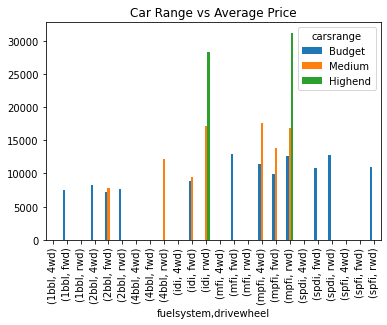

In [103]:
plt.figure(figsize = (25,6))
df = pd.DataFrame(cars.groupby(["fuelsystem","drivewheel","carsrange"])["price"].mean().unstack(fill_value = 0))
df.plot.bar()
plt.title("Car Range vs Average Price")
plt.show()

**Inference :**
1. High ranged cars prefer rwd drivewheel with idi or mpfi fuelsystem.

**List of significant variables after Visual analysis :**

In [ ]:
# - Car Range 
# - Engine Type 
# - Fuel type 
# - Car Body 
# - Aspiration 
# - Cylinder Number 
# - Drivewheel 
# - Curbweight 
# - Car Length
# - Car width
# - Engine Size 
# - Boreratio 
# - Horse Power 
# - Wheel base 
# - Fuel Economy 

In [105]:
cars_lr = cars[["price","fueltype","aspiration","carbody","drivewheel","wheelbase","curbweight",
                "enginetype","cylindernumber","enginesize","boreratio","horsepower",
                "fueleconomy","carlength","carwidth","carsrange"]]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


## **Step 6 : Dummy Variables**

In [106]:
# Defining the map function
def dummies(x,df):
  temp = pd.get_dummies(df[x], drop_first = True)
  df = pd.concat([df, temp], axis = 1)
  df.drop([x], axis = 1, inplace = True)
  return df
# Applying the function to the cars_lr
cars_lr = dummies("fueltype", cars_lr)
cars_lr = dummies("aspiration", cars_lr)
cars_lr = dummies("carbody", cars_lr)
cars_lr = dummies("drivewheel", cars_lr)
cars_lr = dummies("enginetype", cars_lr)
cars_lr = dummies("cylindernumber", cars_lr)
cars_lr = dummies("carsrange", cars_lr)
# Can use OnehotEncoder as well

## **Step 7 : Train-Test Split and feature scaling**

In [108]:
from sklearn.model_selection import train_test_split
np.random.seed(0)

df_train, df_test = train_test_split(cars_lr, train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 100)

In [109]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ["wheelbase","curbweight","enginesize","boreratio","horsepower",
            "fueleconomy","carlength","carwidth","price"]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [110]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0


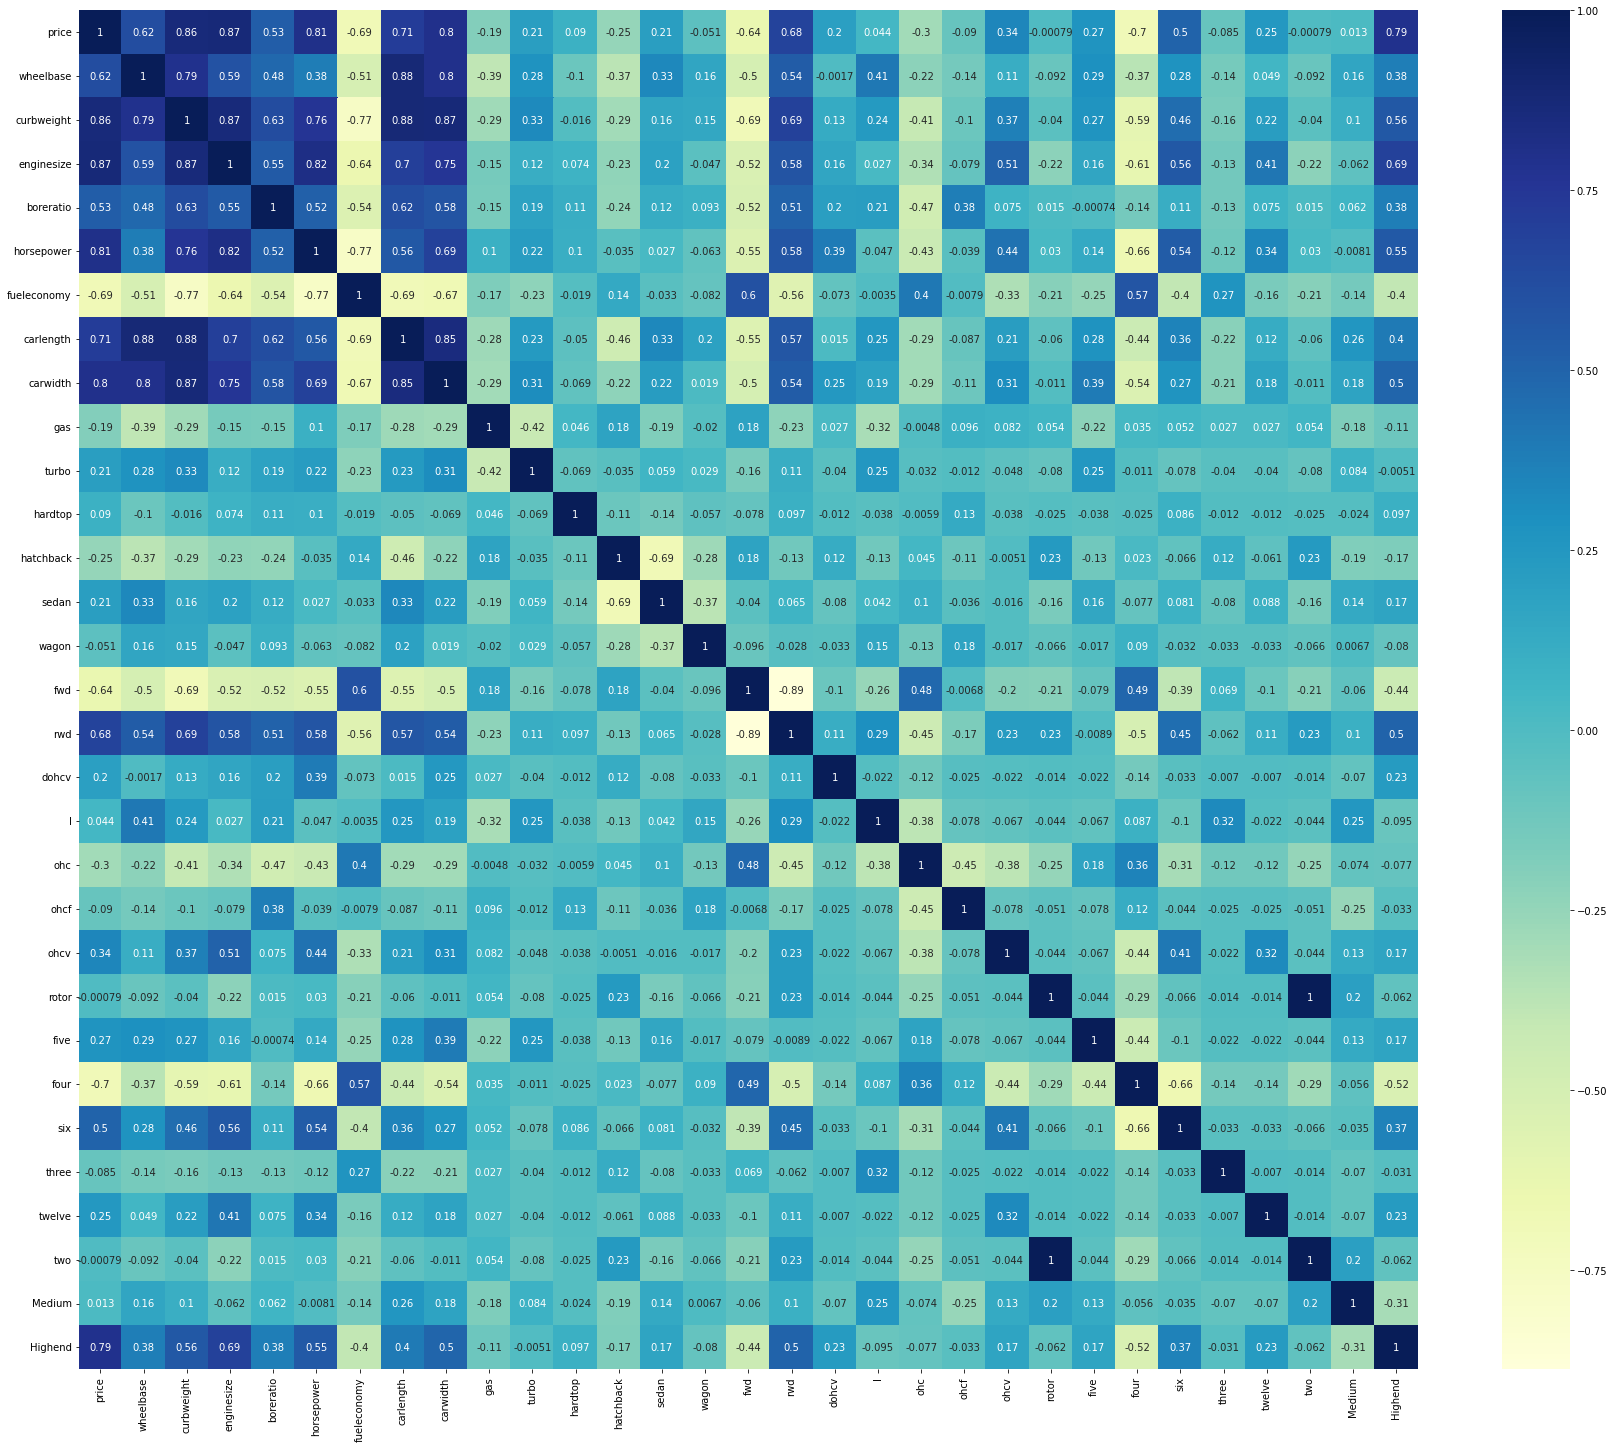

In [111]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [112]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

## **Step 8 : Model Building**

In [114]:
# RFE 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [118]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, step = 10)
rfe = rfe.fit(X_train, y_train)

In [119]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 3),
 ('boreratio', False, 2),
 ('horsepower', True, 1),
 ('fueleconomy', True, 1),
 ('carlength', False, 2),
 ('carwidth', True, 1),
 ('gas', False, 3),
 ('turbo', False, 3),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 3),
 ('rwd', False, 3),
 ('dohcv', True, 1),
 ('l', False, 3),
 ('ohc', False, 2),
 ('ohcf', False, 2),
 ('ohcv', False, 3),
 ('rotor', False, 3),
 ('five', True, 1),
 ('four', True, 1),
 ('six', True, 1),
 ('three', False, 2),
 ('twelve', True, 1),
 ('two', False, 3),
 ('Medium', False, 3),
 ('Highend', True, 1)]

### **Building model using statsmodel, for the detailed statistics**

In [121]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,wheelbase,curbweight,horsepower,fueleconomy,carwidth,hardtop,hatchback,sedan,wagon,dohcv,five,four,six,twelve,Highend
122,0.244828,0.272692,0.083333,0.530864,0.291667,0,0,1,0,0,0,1,0,0,0
125,0.272414,0.500388,0.395833,0.213992,0.666667,0,1,0,0,0,0,1,0,0,1
166,0.272414,0.314973,0.266667,0.344307,0.308333,0,1,0,0,0,0,1,0,0,0
1,0.068966,0.411171,0.262500,0.244170,0.316667,0,0,0,0,0,0,1,0,0,0
199,0.610345,0.647401,0.475000,0.122085,0.575000,0,0,0,1,0,0,1,0,0,0


In [130]:
def build_model(X,y):
  X = sm.add_constant(X) # Adding the constant
  lm = sm.OLS(y, X).fit()
  print(lm.summary())
  return X

def checkVIF(X):
  vif = pd.DataFrame()
  vif["Feature"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif["VIF"] = round(vif["VIF"],2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  return (vif) 

### **MODEL 1**

In [124]:
X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     124.4
Date:                Sat, 02 Jul 2022   Prob (F-statistic):           3.16e-68
Time:                        18:20:46   Log-Likelihood:                 213.80
No. Observations:                 143   AIC:                            -395.6
Df Residuals:                     127   BIC:                            -348.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0108      0.050      0.214      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


p-vale of twelve seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

### **MODEL 2**

In [125]:
X_train_new = X_train_rfe.drop(["twelve"], axis = 1)

In [126]:
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     130.8
Date:                Sat, 02 Jul 2022   Prob (F-statistic):           1.30e-68
Time:                        18:22:38   Log-Likelihood:                 212.01
No. Observations:                 143   AIC:                            -394.0
Df Residuals:                     128   BIC:                            -349.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0290      0.050      0.585      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [127]:
X_train_new = X_train_new.drop(["fueleconomy"], axis = 1)

### **MODEL 3**

In [128]:
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     137.6
Date:                Sat, 02 Jul 2022   Prob (F-statistic):           6.97e-69
Time:                        18:23:44   Log-Likelihood:                 209.92
No. Observations:                 143   AIC:                            -391.8
Df Residuals:                     129   BIC:                            -350.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0765      0.044      1.751      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [131]:
# Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Feature,VIF
0,const,79.21
7,sedan,13.00
2,curbweight,12.56
6,hatchback,11.22
4,carwidth,7.87
1,wheelbase,6.94
3,horsepower,6.49
8,wagon,6.36
11,four,4.69
12,six,3.46


dropping curbweight because of high VIF value. (shows that curbweight has high multicollinearity.)

### **MODEL 4**

In [135]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

In [136]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     138.9
Date:                Sat, 02 Jul 2022   Prob (F-statistic):           1.42e-66
Time:                        18:36:42   Log-Likelihood:                 198.49
No. Observations:                 143   AIC:                            -373.0
Df Residuals:                     131   BIC:                            -337.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0185      0.034     -0.551      0.5

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [137]:
checkVIF(X_train_new)

,Feature,VIF
0,const,40.43
3,carwidth,6.93
9,four,4.67
1,wheelbase,4.30
2,horsepower,4.17
10,six,3.42
8,five,2.22
11,Highend,1.69
7,dohcv,1.42
5,hatchback,1.35


dropping sedan because of high VIF value.

In [132]:
X_train_new = X_train_new.drop(["sedan"], axis = 1)

### **MODEL 5**

In [133]:
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     139.5
Date:                Sat, 02 Jul 2022   Prob (F-statistic):           4.75e-68
Time:                        18:26:20   Log-Likelihood:                 205.00
No. Observations:                 143   AIC:                            -384.0
Df Residuals:                     130   BIC:                            -345.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0162      0.032     -0.502      0.6

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


dropping wagon because of high p-value.

In [134]:
checkVIF(X_train_new)

,Feature,VIF
0,const,40.44
2,curbweight,10.88
4,carwidth,7.84
3,horsepower,6.25
1,wheelbase,5.50
10,four,4.68
11,six,3.42
9,five,2.23
12,Highend,1.74
8,dohcv,1.60


### **MODEL 6**

In [138]:
X_train_new = build_model(X_train_new,y_train)  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     138.9
Date:                Sat, 02 Jul 2022   Prob (F-statistic):           1.42e-66
Time:                        18:40:06   Log-Likelihood:                 198.49
No. Observations:                 143   AIC:                            -373.0
Df Residuals:                     131   BIC:                            -337.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0185      0.034     -0.551      0.5

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [139]:
checkVIF(X_train_new)

,Feature,VIF
0,const,40.43
3,carwidth,6.93
9,four,4.67
1,wheelbase,4.30
2,horsepower,4.17
10,six,3.42
8,five,2.22
11,Highend,1.69
7,dohcv,1.42
5,hatchback,1.35


### **MODEL 7**

In [140]:
#Dropping dohcv to see the changes in model statistics
X_train_new = X_train_new.drop(["dohcv"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     139.4
Date:                Sat, 02 Jul 2022   Prob (F-statistic):           4.40e-65
Time:                        18:40:35   Log-Likelihood:                 191.97
No. Observations:                 143   AIC:                            -361.9
Df Residuals:                     132   BIC:                            -329.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0119      0.035     -0.342      0.7

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,Feature,VIF
0,const,40.30
3,carwidth,6.87
8,four,4.66
1,wheelbase,4.22
2,horsepower,3.86
9,six,3.21
7,five,2.17
10,Highend,1.67
5,hatchback,1.34
6,wagon,1.15


## **Step 9 : Residual Analysis of Model**

In [141]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

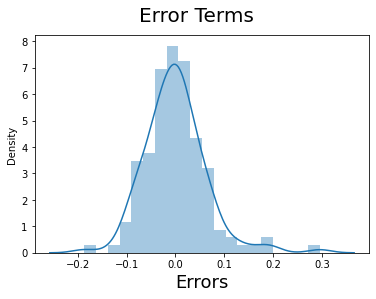

In [142]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

## **Step 10 : Prediction and Evaluation**

In [143]:
# Scaling the test set
num_vars = ["wheelbase","curbweight","enginesize","boreratio","horsepower",
            "fueleconomy","carlength","carwidth","price"]
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [148]:
# Dividing into X and y
y_test = df_test.pop("price")
x_test = df_test

In [148]:
# Now let's use our model to make predictions
X_train_new = X_train_new.drop("const", axis = 1)

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = x_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [150]:
# Making predictions
y_pred = lm.predict(X_test_new)

### **Evaluation of test via comparison of y_pred and y_test**

In [151]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8816880833879972

Text(0, 0.5, 'y_pred')

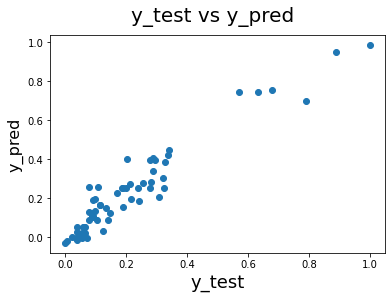

In [152]:
# EVALUATIOn OF THE MODEL
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle("y_test vs y_pred", fontsize = 20)
# Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

### **Evaluation of the model using Statistics**

In [153]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     139.4
Date:                Sat, 02 Jul 2022   Prob (F-statistic):           4.40e-65
Time:                        18:53:22   Log-Likelihood:                 191.97
No. Observations:                 143   AIC:                            -361.9
Df Residuals:                     132   BIC:                            -329.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0119      0.035     -0.342      0.7